In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [18]:
#1.	Firstly, replace all Missing values with relevant figures.

data = pd.read_csv('Dataset_Day8.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [19]:
columns_to_check = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']

data[columns_to_check] = data[columns_to_check].replace(0, float('NaN'))

In [20]:
data.isna().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [21]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [22]:
data['Glucose'].fillna(data['Glucose'].median(),inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(),inplace=True)
data['BMI'].fillna(data['BMI'].median(),inplace=True)

In [23]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
#2.	Then remove all existing outliers and get the final data for classification.

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [25]:
data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
5,5,116.0,74.0,25.6,0.201,30,0


In [26]:
# 3.	Split the data into 70% training and 30% testing data. Then, use a k-Nearest Neighbor algorithm with target variable as ‘Outcome’.
# a.	Print the default model performance metrics: Accuracy, Precision, Recall, F1Score
# b.	Plot a Precision & Recall vs k(no. of neighbours) curve (both Prec and Rec on the same graph). Find the k for which F1-score is the highest. Use any one Distance Metric for this problem.
# c.	Find the best distance metric, no. of neighbors combination for the kNN algorithm


X = data.drop('Outcome',axis=1)
Y = data['Outcome']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=203)
len(X_train),len(X_test)


(494, 213)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import math

k_start = int(math.sqrt(len(X_train)))
print(k_start)
metric_start = 'euclidean'

knn = KNeighborsClassifier(n_neighbors = k_start, metric = metric_start)

# fit the model
knn = knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print("Model Performance metrics are as below :-\n")
print("Accuracy is "+str(accuracy_score(y_test,y_pred)))
print("Precision is "+str(precision_score(y_test,y_pred)))
print("Recall is "+str(recall_score(y_test,y_pred)))
print("F1-Score is "+str(f1_score(y_test,y_pred)))

22
Model Performance metrics are as below :-

Accuracy is 0.7183098591549296
Precision is 0.5833333333333334
Recall is 0.5
F1-Score is 0.5384615384615384


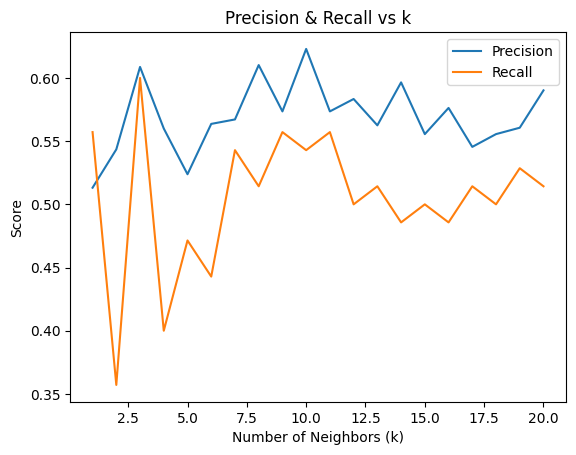

Best k for highest F1-score: 3


In [28]:
k_values = np.arange(1, 21)

precision_scores = []
recall_scores = []
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)


plt.plot(k_values, precision_scores, label='Precision')
plt.plot(k_values, recall_scores, label='Recall')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Precision & Recall vs k')
plt.legend()
plt.show()


max_f1_index = np.argmax(f1_scores)
best_k = k_values[max_f1_index]
print("Best k for highest F1-score:", best_k)

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': k_values, 'metric': ['euclidean', 'manhattan', 'chebyshev']}


grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='f1')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best parameters:", best_params)


Best parameters: {'metric': 'euclidean', 'n_neighbors': 17}
